#### Question 1: What is Boosting in Machine Learning? Explain how it improves weak learners.
Answer: Boosting is an ensemble meta-algorithm primarily used to reduce bias and variance in supervised learning. It works by combining multiple "weak learners" (models that perform slightly better than random guessing) into a single "strong learner."


How it improves weak learners: Unlike Bagging (e.g., Random Forest), which builds models independently, Boosting builds models sequentially.

The first weak learner is trained on the data.

The algorithm identifies the errors (misclassified instances or high residuals) made by this learner.

The next learner focuses specifically on correcting these errors (by increasing the weight of misclassified data points or fitting the residuals).

This process repeats. The final prediction is a weighted sum (for regression) or a weighted vote (for classification) of all the learners.

#### Question 2: What is the difference between AdaBoost and Gradient Boosting in terms of how models are trained?
Answer: The primary difference lies in how they identify and correct the shortcomings of the previous model:

AdaBoost (Adaptive Boosting): It focuses on sample weights. After each iteration, it increases the weights of the data points that were misclassified by the previous model. The next model is forced to focus on these "hard-to-classify" points.



Gradient Boosting (GBM): It focuses on residuals (errors). Instead of changing sample weights, it trains the next model to predict the residual errors (the difference between the actual value and the predicted value) of the previous model. Mathematically, it minimizes a loss function using gradient descent, where each new tree moves the model in the direction of the negative gradient of the loss.

#### Question 3: How does regularization help in XGBoost?
Answer:Regularization in XGBoost prevents overfitting, which is a common issue in standard Gradient Boosting.13 XGBoost includes regularization terms directly in its objective function:$$Obj(\Theta) = L(\Theta) + \Omega(\Theta)$$Where $\Omega(\Theta)$ is the regularization term. It includes:L1 Regularization (Lasso / Alpha): Penalizes the sum of absolute weights of the leaves.14 It encourages sparsity (feature selection).15L2 Regularization (Ridge / Lambda): Penalizes the sum of squared weights of the leaves.16 It keeps the leaf weights small and smooth.Gamma ($\gamma$): A pseudo-regularization parameter that specifies the minimum loss reduction required to make a split.

#### Question 4: Why is CatBoost considered efficient for handling categorical data?
Answer: CatBoost (Categorical Boosting) is efficient because it handles categorical features natively without requiring extensive preprocessing like One-Hot Encoding (which can lead to high dimensionality).

It uses a technique called Ordered Target Statistics (Ordered TS). Instead of calculating target statistics (like the mean target value for a category) using the whole dataset (which causes data leakage/overfitting), CatBoost calculates the statistic for a data point using only the observations that precede it in a random permutation of the dataset. This reduces "prediction shift" and allows the model to leverage categorical data effectively.

#### Question 5: What are some real-world applications where boosting techniques are preferred over bagging methods?
Answer: Boosting is generally preferred when high accuracy is paramount and the data is clean (low noise), as boosting can overfit noisy data.

Credit Risk Modeling (FinTech): Predicting loan defaults where even small improvements in accuracy can save millions (XGBoost/LightGBM are industry standards here).

Search Engine Ranking: Learning to rank search results (e.g., Yahoo and Yandex use boosting).

Medical Diagnosis: Classifying diseases where the distinction between classes is subtle and bias reduction is critical.

Kaggle Competitions: Boosting algorithms often dominate structured/tabular data competitions due to their superior performance optimization.

Question 6: Write a Python program to:
● Train an AdaBoost Classifier on the Breast Cancer dataset
● Print the model accuracy

In [1]:
from sklearn.datasets import load_breast_cancer
from sklearn.ensemble import AdaBoostClassifier
from sklearn.model_selection import train_test_split 
from sklearn.metrics import accuracy_score

data = load_breast_cancer()
X = data.data
y = data.target
# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train AdaBoost Classifier
ada_clf = AdaBoostClassifier(n_estimators=50, random_state=42)
ada_clf.fit(X_train, y_train)

# Predict and Evaluate
y_pred = ada_clf.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)

print(f"AdaBoost Classifier Accuracy: {accuracy:.4f}")

AdaBoost Classifier Accuracy: 0.9649


Question 7: Write a Python program to:
● Train a Gradient Boosting Regressor on the California Housing dataset
● Evaluate performance using R-squared score


In [3]:
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import r2_score
# load data 
data = fetch_california_housing()
x , y= data.data,data.target
# split data 
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.2,random_state=42)

# fit data 
Grad = GradientBoostingRegressor(n_estimators=50,random_state=42)
Grad.fit(x_train,y_train)
y_pred = Grad.predict(x_test)
R2_score = r2_score(y_pred,y_test)
print(f'R2_score Regressor Accuracy: {R2_score:.4f}')

R2_score Regressor Accuracy: 0.5996


Question 8: Write a Python program to:
● Train an XGBoost Classifier on the Breast Cancer dataset
● Tune the learning rate using GridSearchCV
● Print the best parameters and accuracy

In [6]:
import xgboost as xgb
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score

# Load dataset
data = load_breast_cancer()
X, y = data.data, data.target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define Model
xgb_clf = xgb.XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)

# Define Hyperparameters to tune
param_grid = {
    'learning_rate': [0.01, 0.1, 0.2],
    'n_estimators': [50, 100],
    'max_depth': [3, 5]
}

# Grid Search
grid_search = GridSearchCV(estimator=xgb_clf, param_grid=param_grid, scoring='accuracy', cv=3)
grid_search.fit(X_train, y_train)

# Best Parameters
best_params = grid_search.best_params_
best_model = grid_search.best_estimator_

# Evaluate
y_pred = best_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)

print(f"Best Parameters: {best_params}")
print(f"XGBoost Tuned Accuracy: {accuracy:.4f}")

c:\Users\Dell\anaconda3\Lib\site-packages\xgboost\training.py:199: UserWarning: [04:44:19] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
c:\Users\Dell\anaconda3\Lib\site-packages\xgboost\training.py:199: UserWarning: [04:44:19] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
c:\Users\Dell\anaconda3\Lib\site-packages\xgboost\training.py:199: UserWarning: [04:44:19] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
c:\Users\Dell\anaconda3\Lib\site-packages\xgboost\training.py:199: UserWarning: [04:44:19] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain,

Best Parameters: {'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 100}
XGBoost Tuned Accuracy: 0.9561


c:\Users\Dell\anaconda3\Lib\site-packages\xgboost\training.py:199: UserWarning: [04:44:20] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
c:\Users\Dell\anaconda3\Lib\site-packages\xgboost\training.py:199: UserWarning: [04:44:20] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
c:\Users\Dell\anaconda3\Lib\site-packages\xgboost\training.py:199: UserWarning: [04:44:20] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
c:\Users\Dell\anaconda3\Lib\site-packages\xgboost\training.py:199: UserWarning: [04:44:20] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain,

Question 9: Write a Python program to:
● Train a CatBoost Classifier
● Plot the confusion matrix using seaborn


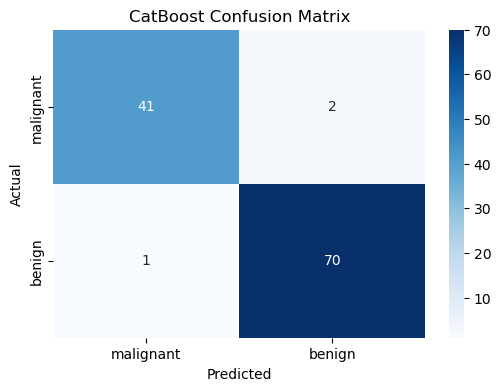

In [1]:
# Note: Requires `pip install catboost seaborn matplotlib`
from catboost import CatBoostClassifier
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Load dataset
data = load_breast_cancer()
X, y = data.data, data.target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train CatBoost
# verbose=0 suppresses the training logs
cat_clf = CatBoostClassifier(iterations=100, learning_rate=0.1, depth=5, verbose=0, random_state=42)
cat_clf.fit(X_train, y_train)

# Predictions
y_pred = cat_clf.predict(X_test)

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)

# Plotting
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=data.target_names, yticklabels=data.target_names)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('CatBoost Confusion Matrix')
plt.show()

#### Question 10: You're working for a FinTech company trying to predict loan default using
customer demographics and transaction behavior.
The dataset is imbalanced, contains missing values, and has both numeric and
categorical features.
Describe your step-by-step data science pipeline using boosting techniques:
● Data preprocessing & handling missing/categorical values
● Choice between AdaBoost, XGBoost, or CatBoost
● Hyperparameter tuning strategy
● Evaluation metrics you'd choose and why
● How the business would benefit from your model

Answer -:

Pipeline Description
Data Preprocessing & Handling:

Missing Values: Since this is financial data, missing values might indicate "no transaction" or "unemployed." For numerical features, I would use median imputation (robust to outliers). For categorical features, I would treat "Missing" as a separate category (e.g., "Unknown").

Imbalance: Loan default datasets are typically highly imbalanced (few defaults, many non-defaults). I would use SMOTE (Synthetic Minority Over-sampling Technique) or use the scale_pos_weight parameter in boosting models to penalize false negatives more heavily.

Categorical Data: No One-Hot Encoding. I will pass categorical indices directly to CatBoost or use Target Encoding for XGBoost to keep dimensionality low.

Model Choice: CatBoost

Why? The prompt specifies the dataset has many categorical features (demographics). CatBoost is superior here as it handles categories natively without leakage. It is also generally robust to parameter tuning defaults compared to XGBoost.

Hyperparameter Tuning Strategy:

I would use Bayesian Optimization (e.g., Optuna) rather than GridSearch, as it converges faster on complex boosting spaces.

Key parameters to tune: learning_rate, depth (tree depth), l2_leaf_reg (regularization), and scale_pos_weight (for imbalance).

Evaluation Metrics:

ROC-AUC: To measure the model's ability to distinguish between defaulters and non-defaulters across thresholds.

Recall (Sensitivity): Critical for this business case. Missing a defaulter (False Negative) is much more expensive for the bank than annoying a good customer (False Positive). We want high Recall.

F1-Score: To balance Precision and Recall.

Business Benefit:

Risk Mitigation: By accurately identifying high-risk applicants, the bank avoids bad debt.

Automation: Speeds up the approval process for low-risk customers.

In [2]:
import pandas as pd
from catboost import CatBoostClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, roc_auc_score
from imblearn.over_sampling import SMOTE

# 1. Mock Data Setup (Representing the FinTech scenario)
# In a real scenario, you would load your .csv file here
data = pd.DataFrame({
    'income': [5000, 10000, 3000, 8000, 12000, 4000] * 20,
    'credit_score': [600, 750, 550, 700, 800, 580] * 20,
    'employment_type': ['Self', 'Salaried', 'Unemployed', 'Salaried', 'Salaried', 'Self'] * 20,
    'default': [1, 0, 1, 0, 0, 1] * 20
})

X = data.drop('default', axis=1)
y = data['default']

# Identify categorical features indices for CatBoost
cat_features_indices = [2]  # 'employment_type' is at index 2

# 2. Preprocessing (Handling Imbalance)
# Note: Usually we split BEFORE oversampling to prevent data leakage
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Handling missing values is done internally by CatBoost for simplicity,
# but SMOTE requires numeric input usually, so for this skeleton we rely on 
# CatBoost's internal 'auto_class_weights' or 'scale_pos_weight' instead of SMOTE 
# to handle the categorical data natively.

# 3. Model Training (CatBoost with Imbalance handling)
model = CatBoostClassifier(
    iterations=200,
    learning_rate=0.1,
    depth=6,
    cat_features=cat_features_indices,
    auto_class_weights='Balanced', # Automatically handles imbalance
    verbose=0,
    eval_metric='AUC'
)

model.fit(X_train, y_train)

# 4. Evaluation
y_pred = model.predict(X_test)
y_prob = model.predict_proba(X_test)[:, 1]

print("--- Business Evaluation Metrics ---")
print(f"ROC-AUC Score: {roc_auc_score(y_test, y_prob):.4f}")
print("\nClassification Report (Focus on Recall for class 1):")
print(classification_report(y_test, y_pred))

# 5. Feature Importance (Business Insight)
feat_importances = model.get_feature_importance()
print("Feature Importances:", dict(zip(X.columns, feat_importances)))

--- Business Evaluation Metrics ---
ROC-AUC Score: 1.0000

Classification Report (Focus on Recall for class 1):
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        12
           1       1.00      1.00      1.00        12

    accuracy                           1.00        24
   macro avg       1.00      1.00      1.00        24
weighted avg       1.00      1.00      1.00        24

Feature Importances: {'income': np.float64(51.73477248594905), 'credit_score': np.float64(12.06013861780781), 'employment_type': np.float64(36.20508889624315)}
